In [7]:
import warnings
# 减少代码执行过程中的不必要提醒
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
# 房屋面积，平方米
x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
# 单位，万元
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

Text(0, 0.5, 'Price')

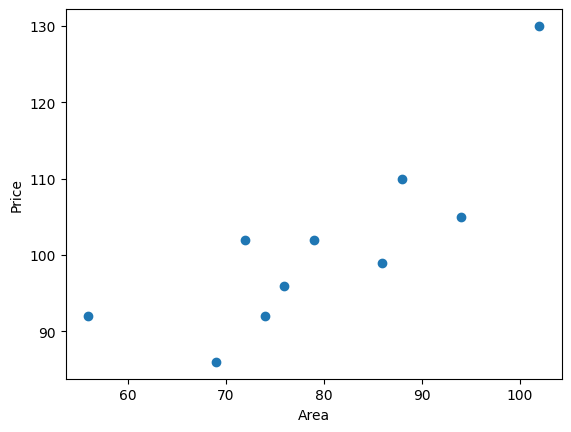

In [9]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y) # 绘制散点图
plt.xlabel("Area")
plt.ylabel("Price")

In [10]:
# 求线性方程，本质上是 求解系数w
def f(x: list, w0: float, w1: float):
    """一元一次函数表达式"""
    y = w0 + w1 * x
    return y

In [11]:
# 残差 = 损失：即真实值和预测值之间的偏离程度
# 转换为求解 损失最小值
def square_loss(x: np.ndarray, y: np.ndarray, w0: float, w1: float):
    """平方损失函数 = 残差的平方和"""
    loss = sum(np.square(y - (w0 + w1 * x)))
    return loss

In [12]:
# 二乘 = 平方，指代上面的平方损失函数
def least_squares_algebraic(x: np.ndarray, y: np.ndarray):
    """最小二乘法代数求解"""
    n = x.shape[0]
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (
        n * sum(x * x) - sum(x) * sum(x)
    )
    return w0, w1

In [13]:
#向函数 least_squares_algebraic(x, y)中传入 x和y得到 w0和w1的值
least_squares_algebraic(x, y)

w0 = least_squares_algebraic(x, y)[0]
w1 = least_squares_algebraic(x, y)[1]

(41.33509168550616, 0.7545842753077117)

In [14]:
# 求得此时的 平方损失值
square_loss(x, y, w0, w1)

447.69153479025357

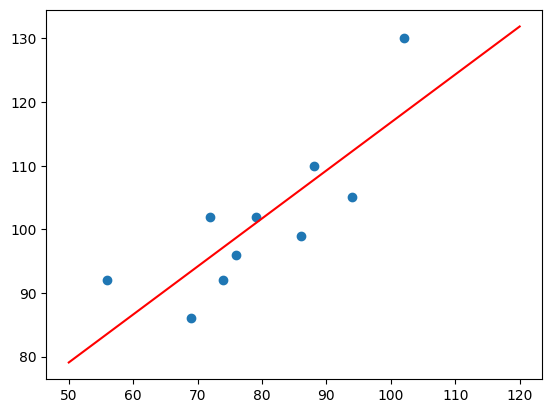

In [15]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点

plt.scatter(x, y)# 绘制散点图
plt.plot(x_temp, x_temp * w1 + w0, "r") # 绘制直线

In [16]:
# 预测，150平方米 
f(150, w0, w1)

154.5227329816629